## CSS Project 2 - Team 3 ##

### Mahader Tamene, Anthony Palafox, & Jessie Harney ###

10.15.20 - Mahader version

#### 1) Introduction ####

Let's import the libraries from Python. 

In [1]:
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from bokeh.models import *
from bokeh.plotting import *
from bokeh.io import *
from bokeh.tile_providers import *
from bokeh.palettes import *
from bokeh.transform import *
from bokeh.layouts import *

Now, let's import our CDC diabetes dataset and view the first five rows (with all columns).

In [2]:
cdc=pd.read_csv("https://raw.githubusercontent.com/jharney0520/CSS_Project2_Team3_Fall2020/main/Diabetes2017.csv")
cdc.head(5)

,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,...,sex and age_total population_21 years and over,sex and age_total population_62 years and over,sex and age_total population_65 years and over,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female
0,Autauga County,Alabama,1001,5178,13489,12525,76.5,55200,54170,1030,...,39614,9403,8050,41831,20054,21777,92.1,8050,3488,4562
1,Baldwin County,Alabama,1003,16707,48542,40024,86.6,208107,204535,3572,...,155502,49811,40665,162430,78104,84326,92.6,40665,18870,21795
2,Barbour County,Alabama,1005,3400,8009,5431,76.2,25782,25429,353,...,19394,5658,4634,20346,10923,9423,115.9,4634,2004,2630
3,Bibb County,Alabama,1007,2371,6534,5827,80.5,22527,22340,187,...,16864,4323,3661,17868,9578,8290,115.5,3661,1633,2028
4,Blount County,Alabama,1009,6282,14227,14365,79.7,57645,56710,935,...,42232,12400,10233,44177,21595,22582,95.6,10233,4540,5693


#### 2) Exploratory Data Analysis ####

Data exploration to uncover interesting findings to guide analysis: 

In [3]:
## Didn't realize there was a space between total and population! Reminder to just copy/paste from the ##
## head output above! ##
cdc = cdc.replace('No Data', np.nan)

## Checking to make sure the "No Data" observations where forced to missing.
#pr=cdc[cdc['State']=="Puerto Rico"]
#pr.head(5)

cdc["Diabetes_Number"]= pd.to_numeric(cdc["Diabetes_Number"], errors='coerce')

cdc.dtypes
## Okay, good - looks like it worked! ##

County                                                                               object
State                                                                                object
CountyFIPS                                                                            int64
Diabetes_Number                                                                     float64
Obesity_Number                                                                       object
                                                                                     ...   
sex and age_total population_18 years and over_female                                 int64
sex and age_total population_18 years and over_sex ratio (males per 100 females)    float64
sex and age_total population_65 years and over_1                                      int64
sex and age_total population_65 years and over_male                                   int64
sex and age_total population_65 years and over_female                           

In [4]:
## Let's make sure that these data seem to match. ##
cdc.head(5)

## Yep, now they're just floats instead. Let's do the same thing with other two ##
cdc["Obesity_Number"]=pd.to_numeric(cdc["Obesity_Number"], errors='coerce')
cdc["Physical_Inactivity_Number"]=pd.to_numeric(cdc["Physical_Inactivity_Number"], errors='coerce')

#did with another
cdc["sex and age_total population_65 years and over_sex ratio (males per 100 females)"] = pd.to_numeric(cdc["sex and age_total population_65 years and over_sex ratio (males per 100 females)"], errors = 'coerce')

cdc.dtypes

County                                                                               object
State                                                                                object
CountyFIPS                                                                            int64
Diabetes_Number                                                                     float64
Obesity_Number                                                                      float64
                                                                                     ...   
sex and age_total population_18 years and over_female                                 int64
sex and age_total population_18 years and over_sex ratio (males per 100 females)    float64
sex and age_total population_65 years and over_1                                      int64
sex and age_total population_65 years and over_male                                   int64
sex and age_total population_65 years and over_female                           

In [5]:
## Okay, let's make diabetes and obesity cases per 1,000. ##
cdc['Diabetes_Per1000']=cdc['Diabetes_Number']/(cdc['race_total population']/1000)
cdc['Obesity_Per1000']=cdc['Obesity_Number']/(cdc['race_total population']/1000)

minmax_diabper1000=[min(cdc['Diabetes_Per1000']), max(cdc['Diabetes_Per1000'])]
minmax_diabper1000

[19.038119606227504, 224.20788253477588]

In [6]:
#drop missing data
#cdc.dropna(subset =['Diabetes_Number'])
#cdc.describe()

Plot of three different graphs:

##### Plot 1: Distribution of Diabetes Cases across Counties in the U.S #####

Text(0, 0.5, 'Number of Counties')

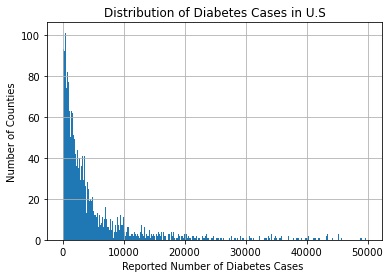

In [7]:
#histogram of Diabetes cases
cdc.hist('Diabetes_Number', bins = range(0, 50000, 100))
plt.title('Distribution of Diabetes Cases in U.S')
plt.xlabel('Reported Number of Diabetes Cases ')
plt.ylabel('Number of Counties')

##### Plot 1 findings #####
What we do see is that a majority of the counties in the U.S. report somewhere between 0 and 5,000 diabetes cases.  There are a few outliers, i.e. few counties with 30-50K cases.  While this visualization is truncated, we see there are very few counties >100K, and just one county >500K   

##### Plot 2: Diabetes Cases by State

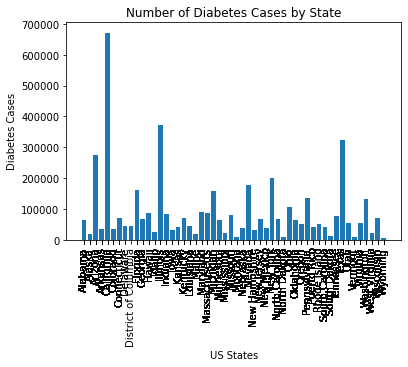

In [8]:
## plot of diabetes by state
x = cdc['State']
y = cdc['Diabetes_Number']
plt.bar(list(x), y)

plt.title('Number of Diabetes Cases by State')
plt.xticks(x, rotation = 90)
plt.xlabel('US States')
plt.ylabel('Diabetes Cases')
plt.show()

##### Plot 2B: Diabetes Cases by Geographic Location

(can't figure out)

In [9]:


#create geographic area variable

#West = Alaska, California, Oregon, Washington, Nevada
       #Utah, Idaho, Montana, Wyoming, Colorado, Arizona, New Mexico

#Midwest = North Dakota, South Dakota, Nebraska, Kansas, Minnesota, Iowa, Missouri
#Wisconsin, Illinois, Indiana, Michigan, Ohio

#South = Oklahoma, Texas, Arkansas, Louisiana, Mississippi, 
# Alabama, Georgia, Florida, Tenesee, Kentucky, West Virgina,
#Virginia, North Carolina, South Carolina, Maryland, Deleware, Washington D.C.

#Northeast = Pennsylvania, New York, New Jersey, Connecticut, Rhode Islad, Massachusetts, New Hampshire, 
# Vermont, Maine

#Other = Puerto Rico

west = nomiss_stdcdc({"State": ["Alaska" , "California" , "Oregon" , "Washington" , 
                          "Nevada", "Utah" , "Idaho" , "Montana" , "Idaho" , 
                          "Montana" , "Wyoming" , "Colorado" , "Arizona" , 
                          "New Mexico"]})


pd.DataFrame({'race': ['White', 'Black or African American', 'American Indian & Alaska Native',
                                 'Asian', 'Native Hawaiian & Other Pacific Islander', 'Other race'],
                        'Count': [race_white, race_black, race_aaai, race_asian, race_nhpi, race_other]},
                       )

midwest = cdc({"State": ["North Dakota", "South Dakota" , "Nebraska", "Kansas", 
                             "Minnesota", "Iowa", "Missouri", "Wisconsin", "Illinois", 
                             "Indiana", "Michigan", "Ohio"]})

south = cdc({"State": ["Oklahoma", "Texas", "Arkansas", "Louisiana", "Mississippi", 
                           "Alabama", "Georgia", "Florida", "Tenesee", "Kentucky", "West Virgina",
                           "Virginia", "North Carolina", "South Carolina", "Maryland", 
                           "Deleware", "District of Columbia"]})

northeast = cdc({"State": ["Pennsylvania", "New York", "New Jersey", "Connecticut", 
                               "Rhode Island", "Massachusetts", "New Hampshire", 
                               "Vermont", "Maine"]})

otherregion = cdc({"State": ["Puerto Rico"]})

NameError: name 'nomiss_stdcdc' is not defined

In [11]:
#create racial category variable
race_black = sum(cdc["race_total population_one race_black or african american"])
race_white = sum(cdc["race_total population_one race_white"])
race_aaai = sum(cdc["race_total population_one race_american indian and alaska native"])
race_asian = sum(cdc["race_total population_one race_asian"])
race_nhpi = sum(cdc["race_total population_one race_native hawaiian and other pacific islander"])
race_other = sum(cdc["race_total population_one race_some other race"])

race_cat = pd.DataFrame({'race': ['White', 'Black or African American', 'American Indian & Alaska Native',
                                 'Asian', 'Native Hawaiian & Other Pacific Islander', 'Other race'],
                        'Count': [race_white, race_black, race_aaai, race_asian, race_nhpi, race_other]},
                       )

race_cat

,race,Count
0,White,237188538
1,Black or African American,41281123
2,American Indian & Alaska Native,2707577
3,Asian,17581234
4,Native Hawaiian & Other Pacific Islander,583021
5,Other race,16337215


In [12]:
#race category proportion
race_black_prop = sum(cdc["race_total population_one race_black or african american"])/ sum(cdc["race_total population_one race_1"])
race_white_prop = sum(cdc["race_total population_one race_white"]) /sum(cdc["race_total population_one race_1"])
race_aaai_prop = sum(cdc["race_total population_one race_american indian and alaska native"]) /sum(cdc["race_total population_one race_1"])
race_asian_prop = sum(cdc["race_total population_one race_asian"])/sum(cdc["race_total population_one race_1"])
race_nhpi_prop = sum(cdc["race_total population_one race_native hawaiian and other pacific islander"])/sum(cdc["race_total population_one race_1"])
race_other_prop = sum(cdc["race_total population_one race_some other race"])/sum(cdc["race_total population_one race_1"])

race_cat_prop = pd.DataFrame({'race': ['White', 'Black or African American', 'American Indian & Alaska Native',
                                 'Asian', 'Native Hawaiian & Other Pacific Islander', 'Other race'],
                        'Count': [race_white_prop, race_black_prop, race_aaai_prop, race_asian_prop, race_nhpi_prop, race_other_prop]},
                       )

race_cat_prop

,race,Count
0,White,0.751361
1,Black or African American,0.130769
2,American Indian & Alaska Native,0.008577
3,Asian,0.055693
4,Native Hawaiian & Other Pacific Islander,0.001847
5,Other race,0.051753


In [13]:
#check if categorization has total
#sum1 = sum(cdc["race_total population_one race_1"])
#sum2 = race_black + race_white + race_aaai + race_asian + race_nhpi + race_other
#it does! 315678708

In [14]:
#white/non-white ratio
cdc['white_other_ratio'] = cdc["race_total population_one race_white"] / (cdc["race_total population_one race_american indian and alaska native"]+ 
cdc["race_total population_one race_asian"]+
cdc["race_total population_one race_native hawaiian and other pacific islander"] + 
cdc["race_total population_one race_some other race"])*100

cdc.head(10)

,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,...,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female,Diabetes_Per1000,Obesity_Per1000,white_other_ratio
0,Autauga County,Alabama,1001,5178.0,13489.0,12525.0,76.5,55200,54170,1030,...,41831,20054,21777,92.1,8050,3488,4562,93.804348,244.365942,3633.304795
1,Baldwin County,Alabama,1003,16707.0,48542.0,40024.0,86.6,208107,204535,3572,...,162430,78104,84326,92.6,40665,18870,21795,80.280817,233.255008,3422.802669
2,Barbour County,Alabama,1005,3400.0,8009.0,5431.0,76.2,25782,25429,353,...,20346,10923,9423,115.9,4634,2004,2630,131.874952,310.643084,1289.968321
3,Bibb County,Alabama,1007,2371.0,6534.0,5827.0,80.5,22527,22340,187,...,17868,9578,8290,115.5,3661,1633,2028,105.251476,290.051938,31977.777778
4,Blount County,Alabama,1009,6282.0,14227.0,14365.0,79.7,57645,56710,935,...,44177,21595,22582,95.6,10233,4540,5693,108.977361,246.803712,6933.753149
5,Bullock County,Alabama,1011,2321.0,3662.0,3333.0,73.6,10352,10352,0,...,8202,4527,3675,123.2,1616,685,931,224.207883,353.748068,1243.715847
6,Butler County,Alabama,1013,2910.0,6999.0,6027.0,69.1,20025,19702,323,...,15459,6967,8492,82.0,3806,1555,2251,145.318352,349.513109,4469.527897
7,Calhoun County,Alabama,1015,14692.0,34366.0,26949.0,73.7,115098,112362,2736,...,89902,42495,47407,89.6,19386,8223,11163,127.647744,298.580340,2735.230179
8,Chambers County,Alabama,1017,4787.0,10974.0,7461.0,73.3,33826,33479,347,...,26820,12684,14136,89.7,6409,2711,3698,141.518359,324.424999,2877.843427
9,Cherokee County,Alabama,1019,3176.0,7767.0,6136.0,86.7,25853,25645,208,...,20567,10167,10400,97.8,5621,2611,3010,122.848412,300.429351,6298.425197


##### Plot 3A: Racial distribution of Diabetes Cases

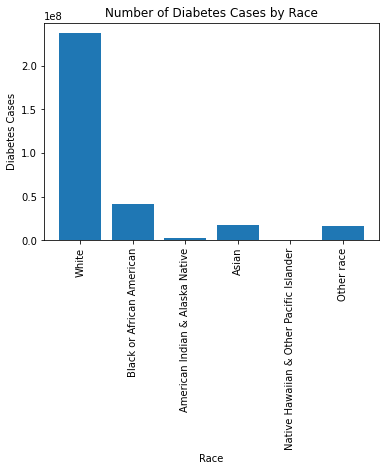

In [15]:
## plot of diabetes by race
x = race_cat['race']
y = race_cat['Count']
plt.bar(x, y)

plt.title('Number of Diabetes Cases by Race')
plt.xticks(x, rotation = 90)
plt.xlabel('Race')
plt.ylabel('Diabetes Cases')
plt.show()

##### Plot 3B: Racial distribution of Diabetes Cases

/Users/mahadertamene/opt/anaconda3/lib/python3.8/site-packages/numpy/core/function_base.py:153: RuntimeWarning: invalid value encountered in multiply
  y *= step
/Users/mahadertamene/opt/anaconda3/lib/python3.8/site-packages/numpy/linalg/linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


Text(0, 0.5, 'Diabetes Cases')

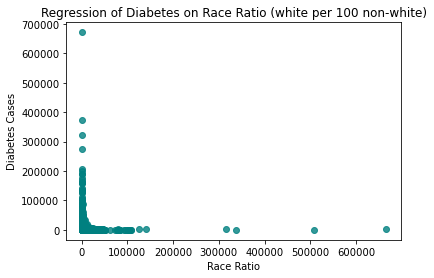

In [16]:
#plot white vs. non-white diabetes

sns.regplot(x='white_other_ratio', y='Diabetes_Number', data=cdc, color='teal')

plt.title('Regression of Diabetes on Race Ratio (white per 100 non-white)')
plt.xlabel('Race Ratio')
plt.ylabel('Diabetes Cases')

##### Findings from Plot 3B ####

We see from this plot above that those counties with the lowest white-non-white ratio have the highest diabetes rates. This may point to some racial disparities in diabetes.

## 3) Prepare to Fit Models ##

### 3.1 Clean Data ###

##### Remove any features that should not be used in the analysis (for instance, county name), transform categorical features so they can be used in a machine learning pipeline, and conduct any other steps necessary to prepare the data for fitting models.

To check for multi-colinearity, let's do a Pearson correlation matrix (while some the cutoff for what "too high" of a correlation is to include both features in your model, [Vatcheva et al., 2016](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4888898/#:~:text=When%20a%20multicollinearity%20diagnostic%20is,cutoff%20is%200.80%20%5B37%5D./) suggest using $\rho \geq 0.80$ as being too highly colinear.

In [17]:
correlation_matrix=cdc.corr()
correlation_matrix

,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_1,race_total population_one race_white,...,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female,Diabetes_Per1000,Obesity_Per1000,white_other_ratio
CountyFIPS,1.000000,-0.058210,-0.048305,-0.058270,-0.001642,-0.062247,-0.061799,-0.067459,-0.061799,-0.058167,...,-0.063146,-0.063787,-0.062520,-0.042104,-0.072152,-0.074237,-0.070496,0.049620,-0.012607,-0.004926
Diabetes_Number,-0.058210,1.000000,0.990744,0.989933,-0.178905,0.988006,0.988123,0.896694,0.988123,0.960996,...,0.987577,0.986276,0.988453,-0.110048,0.980963,0.978744,0.981863,-0.108326,-0.164160,-0.067848
Obesity_Number,-0.048305,0.990744,1.000000,0.988874,-0.179807,0.987672,0.988195,0.887630,0.988195,0.973550,...,0.985201,0.984299,0.985705,-0.110727,0.971566,0.969766,0.972157,-0.143511,-0.167971,-0.072149
Physical_Inactivity_Number,-0.058270,0.989933,0.988874,1.000000,-0.182545,0.980230,0.981177,0.870578,0.981177,0.960184,...,0.979339,0.977340,0.980881,-0.112912,0.974480,0.971347,0.976089,-0.129663,-0.172566,-0.070150
sex and age_total population_65 years and over_sex ratio (males per 100 females),-0.001642,-0.178905,-0.179807,-0.182545,1.000000,-0.158015,-0.158706,-0.127210,-0.158706,-0.160921,...,-0.158274,-0.155262,-0.161058,0.374793,-0.160557,-0.153997,-0.165450,-0.115831,-0.101634,0.026148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sex and age_total population_65 years and over_male,-0.074237,0.978744,0.969766,0.971347,-0.153997,0.981448,0.981260,0.898064,0.981260,0.973454,...,0.984309,0.983659,0.984574,-0.105544,0.999397,1.000000,0.998120,-0.146227,-0.203088,-0.068176
sex and age_total population_65 years and over_female,-0.070496,0.981863,0.972157,0.976089,-0.165450,0.983572,0.983612,0.894512,0.983612,0.969699,...,0.986819,0.985361,0.987845,-0.108291,0.999646,0.998120,1.000000,-0.143118,-0.199384,-0.067043
Diabetes_Per1000,0.049620,-0.108326,-0.143511,-0.129663,-0.115831,-0.155992,-0.155823,-0.146080,-0.155823,-0.180060,...,-0.155016,-0.156183,-0.153861,-0.076799,-0.144533,-0.146227,-0.143118,1.000000,0.546583,0.072682
Obesity_Per1000,-0.012607,-0.164160,-0.167971,-0.172566,-0.101634,-0.198262,-0.197569,-0.197426,-0.197569,-0.215688,...,-0.199477,-0.199849,-0.199055,0.021872,-0.201083,-0.203088,-0.199384,0.546583,1.000000,0.067156


In [18]:
## See all features we have in dataset ## 
for col in cdc.columns: 
   print(col)

County
State
CountyFIPS
Diabetes_Number
Obesity_Number
Physical_Inactivity_Number
sex and age_total population_65 years and over_sex ratio (males per 100 females)
race_total population
race_total population_one race
race_total population_two or more races
race_total population_one race_1
race_total population_one race_white
race_total population_one race_black or african american
race_total population_one race_american indian and alaska native
race_total population_one race_american indian and alaska native_cherokee tribal grouping
race_total population_one race_american indian and alaska native_chippewa tribal grouping
race_total population_one race_american indian and alaska native_navajo tribal grouping
race_total population_one race_american indian and alaska native_sioux tribal grouping
race_total population_one race_asian
race_total population_one race_asian_asian indian
race_total population_one race_asian_chinese
race_total population_one race_asian_filipino
race_total populati

In [19]:
## Replaces the frequency with the proportion of the population in each categor for race ##
cdc[['race_total population_one race',
'race_total population_two or more races',
'race_total population_one race_1',
'race_total population_one race_white',
'race_total population_one race_black or african american',
'race_total population_one race_american indian and alaska native',
'race_total population_one race_american indian and alaska native_cherokee tribal grouping',
'race_total population_one race_american indian and alaska native_chippewa tribal grouping',
'race_total population_one race_american indian and alaska native_navajo tribal grouping',
'race_total population_one race_american indian and alaska native_sioux tribal grouping',
'race_total population_one race_asian',
'race_total population_one race_asian_asian indian',
'race_total population_one race_asian_chinese',
'race_total population_one race_asian_filipino',
'race_total population_one race_asian_japanese',
'race_total population_one race_asian_korean',
'race_total population_one race_asian_vietnamese',
'race_total population_one race_asian_other asian',
'race_total population_one race_native hawaiian and other pacific islander',
'race_total population_one race_native hawaiian and other pacific islander_native hawaiian',
'race_total population_one race_native hawaiian and other pacific islander_guamanian or chamorro',
'race_total population_one race_native hawaiian and other pacific islander_samoan',
'race_total population_one race_native hawaiian and other pacific islander_other pacific islander',
'race_total population_one race_some other race',
'race_total population_two or more races_1',
'race_total population_two or more races_white and black or african american',
'race_total population_two or more races_white and american indian and alaska native',
'race_total population_two or more races_white and asian',
'race_total population_two or more races_black or african american and american indian and alaska native',
'race alone or in combination with one or more other races_total population',
'race alone or in combination with one or more other races_total population_white',
'race alone or in combination with one or more other races_total population_black or african american',
'race alone or in combination with one or more other races_total population_american indian and alaska native',
'race alone or in combination with one or more other races_total population_asian',
'race alone or in combination with one or more other races_total population_native hawaiian and other pacific islander',
'race alone or in combination with one or more other races_total population_some other race',
]]=cdc[['race_total population_one race',
'race_total population_two or more races',
'race_total population_one race_1',
'race_total population_one race_white',
'race_total population_one race_black or african american',
'race_total population_one race_american indian and alaska native',
'race_total population_one race_american indian and alaska native_cherokee tribal grouping',
'race_total population_one race_american indian and alaska native_chippewa tribal grouping',
'race_total population_one race_american indian and alaska native_navajo tribal grouping',
'race_total population_one race_american indian and alaska native_sioux tribal grouping',
'race_total population_one race_asian',
'race_total population_one race_asian_asian indian',
'race_total population_one race_asian_chinese',
'race_total population_one race_asian_filipino',
'race_total population_one race_asian_japanese',
'race_total population_one race_asian_korean',
'race_total population_one race_asian_vietnamese',
'race_total population_one race_asian_other asian',
'race_total population_one race_native hawaiian and other pacific islander',
'race_total population_one race_native hawaiian and other pacific islander_native hawaiian',
'race_total population_one race_native hawaiian and other pacific islander_guamanian or chamorro',
'race_total population_one race_native hawaiian and other pacific islander_samoan',
'race_total population_one race_native hawaiian and other pacific islander_other pacific islander',
'race_total population_one race_some other race',
'race_total population_two or more races_1',
'race_total population_two or more races_white and black or african american',
'race_total population_two or more races_white and american indian and alaska native',
'race_total population_two or more races_white and asian',
'race_total population_two or more races_black or african american and american indian and alaska native',
'race alone or in combination with one or more other races_total population',
'race alone or in combination with one or more other races_total population_white',
'race alone or in combination with one or more other races_total population_black or african american',
'race alone or in combination with one or more other races_total population_american indian and alaska native',
'race alone or in combination with one or more other races_total population_asian',
'race alone or in combination with one or more other races_total population_native hawaiian and other pacific islander',
'race alone or in combination with one or more other races_total population_some other race',
]].div(cdc['race_total population'], axis=0)

cdc.head(5)

,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,...,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female,Diabetes_Per1000,Obesity_Per1000,white_other_ratio
0,Autauga County,Alabama,1001,5178.0,13489.0,12525.0,76.5,55200,0.981341,0.018659,...,41831,20054,21777,92.1,8050,3488,4562,93.804348,244.365942,3633.304795
1,Baldwin County,Alabama,1003,16707.0,48542.0,40024.0,86.6,208107,0.982836,0.017164,...,162430,78104,84326,92.6,40665,18870,21795,80.280817,233.255008,3422.802669
2,Barbour County,Alabama,1005,3400.0,8009.0,5431.0,76.2,25782,0.986308,0.013692,...,20346,10923,9423,115.9,4634,2004,2630,131.874952,310.643084,1289.968321
3,Bibb County,Alabama,1007,2371.0,6534.0,5827.0,80.5,22527,0.991699,0.008301,...,17868,9578,8290,115.5,3661,1633,2028,105.251476,290.051938,31977.777778
4,Blount County,Alabama,1009,6282.0,14227.0,14365.0,79.7,57645,0.983780,0.016220,...,44177,21595,22582,95.6,10233,4540,5693,108.977361,246.803712,6933.753149


In [20]:
## Replace the value with the proportion of the population in each category for Hispanic background ##
cdc[['hispanic or latino and race_total population_hispanic or latino (of any race)',
'hispanic or latino and race_total population_hispanic or latino (of any race)_mexican',
'hispanic or latino and race_total population_hispanic or latino (of any race)_puerto rican',
'hispanic or latino and race_total population_hispanic or latino (of any race)_cuban',
'hispanic or latino and race_total population_hispanic or latino (of any race)_other hispanic or latino',
'hispanic or latino and race_total population_not hispanic or latino',
'hispanic or latino and race_total population_not hispanic or latino_white alone',
'hispanic or latino and race_total population_not hispanic or latino_black or african american alone',
'hispanic or latino and race_total population_not hispanic or latino_american indian and alaska native alone',
'hispanic or latino and race_total population_not hispanic or latino_asian alone',
'hispanic or latino and race_total population_not hispanic or latino_native hawaiian and other pacific islander alone',
'hispanic or latino and race_total population_not hispanic or latino_some other race alone',
'hispanic or latino and race_total population_not hispanic or latino_two or more races',
'hispanic or latino and race_total population_not hispanic or latino_two or more races_two races including some other race',
'hispanic or latino and race_total population_not hispanic or latino_two or more races_two races excluding some other race -  and three or more races']]=cdc[['hispanic or latino and race_total population_hispanic or latino (of any race)',
'hispanic or latino and race_total population_hispanic or latino (of any race)_mexican',
'hispanic or latino and race_total population_hispanic or latino (of any race)_puerto rican',
'hispanic or latino and race_total population_hispanic or latino (of any race)_cuban',
'hispanic or latino and race_total population_hispanic or latino (of any race)_other hispanic or latino',
'hispanic or latino and race_total population_not hispanic or latino',
'hispanic or latino and race_total population_not hispanic or latino_white alone',
'hispanic or latino and race_total population_not hispanic or latino_black or african american alone',
'hispanic or latino and race_total population_not hispanic or latino_american indian and alaska native alone',
'hispanic or latino and race_total population_not hispanic or latino_asian alone',
'hispanic or latino and race_total population_not hispanic or latino_native hawaiian and other pacific islander alone',
'hispanic or latino and race_total population_not hispanic or latino_some other race alone',
'hispanic or latino and race_total population_not hispanic or latino_two or more races',
'hispanic or latino and race_total population_not hispanic or latino_two or more races_two races including some other race',
'hispanic or latino and race_total population_not hispanic or latino_two or more races_two races excluding some other race -  and three or more races']].div(cdc['hispanic or latino and race_total population'], axis=0)

In [21]:
## Replace with proportion of one-race (new variables instead of reassignment, since that would overwrite others) ##
cdc[['onerace_white', 
    'onerace_blackorafricanamerican', 
    'onerace_aminalnative',
    'onerace_amindalnative_cherokee',
    'onerace_amindalnative_chippewa',
    'onerace_amindalnative_navajo',
    'onerace_amindalnative_sioux',
    'onerace_asian', 
    'onerace_asian_indian', 
    'onerace_asian_chinese',
    'onerace_asian_filipino',
    'onerace_asian_japanese', 
    'onerace_asian_korean', 
    'onerace_asian_vietnamese', 
    'onerace_asian_otherasian',
    'onerace_nativehwpi', 
    'onerace_nativehwpi_hawaiian', 
    'onerace_nativehwpi_guamcham',
    'onerace_nativehwpi_samon', 
    'onerace_nativehwpi_otherpi', 
    'onerace_other']]=cdc[['race_total population_one race_white',
    'race_total population_one race_black or african american',
    'race_total population_one race_american indian and alaska native',
    'race_total population_one race_american indian and alaska native_cherokee tribal grouping',
    'race_total population_one race_american indian and alaska native_chippewa tribal grouping',
    'race_total population_one race_american indian and alaska native_navajo tribal grouping',
    'race_total population_one race_american indian and alaska native_sioux tribal grouping',
    'race_total population_one race_asian',
    'race_total population_one race_asian_asian indian',
    'race_total population_one race_asian_chinese',
    'race_total population_one race_asian_filipino',
    'race_total population_one race_asian_japanese',
    'race_total population_one race_asian_korean',
    'race_total population_one race_asian_vietnamese',
    'race_total population_one race_asian_other asian',
    'race_total population_one race_native hawaiian and other pacific islander',
    'race_total population_one race_native hawaiian and other pacific islander_native hawaiian',
    'race_total population_one race_native hawaiian and other pacific islander_guamanian or chamorro',
    'race_total population_one race_native hawaiian and other pacific islander_samoan',
    'race_total population_one race_native hawaiian and other pacific islander_other pacific islander',
    'race_total population_one race_some other race']].div(cdc['race_total population_one race'], axis=0)

In [22]:
## Create the same for two or more races ##
cdc[['twoormoreraces_whiteandblack','twoormoreraces_whiteandaminalan', 'twoormoreraces_whiteandaisan', 'twoormoreraces_blakandaminalan']]=cdc[[
'race_total population_two or more races_white and black or african american',
'race_total population_two or more races_white and american indian and alaska native',
'race_total population_two or more races_white and asian',
'race_total population_two or more races_black or african american and american indian and alaska native']].div(cdc['race_total population_two or more races_1'], axis=0)

In [23]:
## Citizen voting age variables (of voting age, male and female) ##
cdc[['ofvotingage_male', 'ofvotingage_female']]=cdc[['citizen -  voting age population_citizen -  18 and over population_male',
'citizen -  voting age population_citizen -  18 and over population_female']].div(cdc['citizen -  voting age population_citizen -  18 and over population'], axis=0)

In [24]:
## Age categories to proportions ##
cdc[['sex and age_total population_under 5 years',
'sex and age_total population_5 to 9 years',
'sex and age_total population_10 to 14 years',
'sex and age_total population_15 to 19 years',
'sex and age_total population_20 to 24 years',
'sex and age_total population_25 to 34 years',
'sex and age_total population_35 to 44 years',
'sex and age_total population_45 to 54 years',
'sex and age_total population_55 to 59 years',
'sex and age_total population_60 to 64 years',
'sex and age_total population_65 to 74 years',
'sex and age_total population_75 to 84 years',
'sex and age_total population_85 years and over']]=cdc[['sex and age_total population_under 5 years',
'sex and age_total population_5 to 9 years',
'sex and age_total population_10 to 14 years',
'sex and age_total population_15 to 19 years',
'sex and age_total population_20 to 24 years',
'sex and age_total population_25 to 34 years',
'sex and age_total population_35 to 44 years',
'sex and age_total population_45 to 54 years',
'sex and age_total population_55 to 59 years',
'sex and age_total population_60 to 64 years',
'sex and age_total population_65 to 74 years',
'sex and age_total population_75 to 84 years',
'sex and age_total population_85 years and over']].div(cdc['sex and age_total population'], axis=0)

In [25]:
## One more! A few more of the age/sex vars ##
cdc[['sex and age_total population_median age (years)',
'sex and age_total population_under 18 years',
'sex and age_total population_16 years and over',
'sex and age_total population_18 years and over',
'sex and age_total population_21 years and over',
'sex and age_total population_62 years and over',
'sex and age_total population_65 years and over',
'sex and age_total population_18 years and over_male',
'sex and age_total population_18 years and over_female',
'sex and age_total population_65 years and over_male',
'sex and age_total population_65 years and over_female']]=cdc[['sex and age_total population_median age (years)',
'sex and age_total population_under 18 years',
'sex and age_total population_16 years and over',
'sex and age_total population_18 years and over',
'sex and age_total population_21 years and over',
'sex and age_total population_62 years and over',
'sex and age_total population_65 years and over',
'sex and age_total population_18 years and over_male',
'sex and age_total population_18 years and over_female',
'sex and age_total population_65 years and over_male',
'sex and age_total population_65 years and over_female']].div(cdc['sex and age_total population'], axis=0)

In [26]:
## Drop variables that are repeats (the _1 vars) and just male just female (we'll just use the ratios, ##
## so long as they exist - (i.e., not for 65+, no ratio). Also drop County ##
cdc=cdc.drop(columns=['sex and age_total population_65 years and over_1', 
          'race_total population_one race_1', 
          'race_total population_two or more races_1',
          'sex and age_total population_18 years and over_1', 
          'sex and age_total population_65 years and over_1', 
          'sex and age_total population_male', 
          'sex and age_total population_female', 
          'sex and age_total population_18 years and over_male',
          'sex and age_total population_18 years and over_female', 'County'])

In [27]:
## Create state dummies (1/0) ##
for elem in cdc['State'].unique():
    cdc[str(elem)] = (cdc['State'] == elem).astype(int)

In [28]:
State_mergeback=cdc[['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut',
                   'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
                   'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
                   'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey',
                   'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 
                   'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas',
                   'Utah', 'Vermont', 'Washington', 'Wisconsin', 'Wyoming']]

cdc=cdc.drop(columns=['State', 'CountyFIPS', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut',
                   'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
                   'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
                   'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey',
                   'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 
                   'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas',
                   'Utah', 'Vermont', 'Washington', 'Wisconsin', 'Wyoming','white_other_ratio'])


## For ratio var - there were some "-" instead of missing! ##
cdc=cdc.replace('-', np.nan)

In [29]:
cdc.shape

(3220, 117)

In [30]:
## Standardize! ## 
## Citing from: https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc ##

# Get column names first
names = cdc.columns

# Create the Scaler object
scaler = preprocessing.StandardScaler()

# Fit your data on the scaler object
scaled_cdc = scaler.fit_transform(cdc)
scaled_cdc = pd.DataFrame(scaled_cdc, columns=names)

In [31]:
## Merge state dummies back in ##
## Cited from: https://towardsdatascience.com/the-dummys-guide-to-creating-dummy-variables-f21faddb1d40 ##
scaled_cdc = scaled_cdc.merge(State_mergeback, left_index=True, right_index=True)

In [32]:
## Let's create a dataset with no missing values! ##
nomiss_stdcdc=scaled_cdc.dropna()

In [33]:
## See all features we have in new dataset ## 
for col in nomiss_stdcdc.columns: 
   print(col)

Diabetes_Number
Obesity_Number
Physical_Inactivity_Number
sex and age_total population_65 years and over_sex ratio (males per 100 females)
race_total population
race_total population_one race
race_total population_two or more races
race_total population_one race_white
race_total population_one race_black or african american
race_total population_one race_american indian and alaska native
race_total population_one race_american indian and alaska native_cherokee tribal grouping
race_total population_one race_american indian and alaska native_chippewa tribal grouping
race_total population_one race_american indian and alaska native_navajo tribal grouping
race_total population_one race_american indian and alaska native_sioux tribal grouping
race_total population_one race_asian
race_total population_one race_asian_asian indian
race_total population_one race_asian_chinese
race_total population_one race_asian_filipino
race_total population_one race_asian_japanese
race_total population_one race

In [34]:

#exclude the target (which is our diabetes variable)
X = nomiss_stdcdc.drop(['Diabetes_Number'], axis = 1)

#X = cdc[['Obesity_Number',
         #'Physical_Inactivity_Number', 
     #'sex and age_total population_18 years and over_sex ratio (males per 100 females)', 
       # 'white_other_ratio']] 

#diabetes numbers
y = nomiss_stdcdc['Diabetes_Number']

In [35]:
X.dtypes

Obesity_Number                                                                      float64
Physical_Inactivity_Number                                                          float64
sex and age_total population_65 years and over_sex ratio (males per 100 females)    float64
race_total population                                                               float64
race_total population_one race                                                      float64
                                                                                     ...   
Utah                                                                                  int64
Vermont                                                                               int64
Washington                                                                            int64
Wisconsin                                                                             int64
Wyoming                                                                         

## 3.2 Partition Data ##

##### Partition the data into train, validation, and test sets. Explain your choice of how much data to include in each set, and the tradeoffs involved with differing sizes in each set. Also describe the purpose of each set. #####

In [36]:
#set the random seed
np.random.seed(10)

#split the data
#train_test_split and return 4 values: X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   train_size = 0.80, test_size = 0.20)

In [37]:
#check dimensions of each 
print("Shape of X train is", X_train.shape)
print("Shape of y_train is", y_train.shape)
print("Shape of X_test is", X_test.shape)
print("Shape of y_test is", y_test.shape)

Shape of X train is (2467, 164)
Shape of y_train is (2467,)
Shape of X_test is (617, 164)
Shape of y_test is (617,)


In [38]:
#Validation set
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train,
                                                    train_size=0.75, test_size=0.25)

#when would we sub in different numbers for different data. feel like with more sparse data, 
#we may want more in our training sie?

#thinking about changing the train, test proportions and see how that changes the performance...

How much data to include in each set?
tradeoffs involved with differing sizes in each set?
purpose of each set?
- data splitting into multiple sets is a way to better equip the data to be able to perform well on out of sample data. This process of splitting our data accounts for machine learning models proclivity to overfitting, which makes it less generalizable outside of the exisiting data. In order to figure out the extent of this problem and correct for it, data is split before running a model. 

- the training set is what we train the data on to improve model accuracy and fit
- the testing set is what we test the data on, to see how well our model performs in predicting the data
- the validation set is the set we use to try out the models, and tweak accordingly before we finally test. we predict on this set before finally predicting on the testing set.

## 3.3 Feature Selection ##

##### Investigate whether there are any features that you should remove prior to model fitting. For example, you might investigate whether there are highly correlated features or features with low variance. You may also consider using plots and relationships you found in the EDA stage for this question. #####

Before going through validation, we decided to include features that have high co-linearity (i.e. Physical_Inactivity_Number, Obesity_Number).  
Come back and write down what we did to transform all the variables and what we exlcuded...

## 4) Train Models ##

## 4.1 Model Description ##

##### Do the following:
##### • Choose 5 different machine learning techniques. See available ones in the [scikit-learn](https://scikit-learn.org/stable/) documentation.
##### • Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem. #####

5 different machine learning techniques; why it's a plausible choice for this problem
1. Linear Regression - we have a continuous-valued feature we are trying predict. 
2. Ridge Regression - penalizes for observations that are too far (outliers). Would see tighter coefficients as a consequence.
3. LASSO Regression - LASSO drops features that are co-linear to zero

###### 4 and 5? -- Aniket suggestions: elastic net and trees 

## 4.2 Train Models ##

##### Train each model in the training set, and be sure to tune hyperparameters if appropriate. Report any relevant summary statistics from the training set, including how well each model fits the training data. #####

#### Model 1: Linear Regression

In [39]:
#1. Linear Regression

#create a model
lin_reg = LinearRegression(normalize = True)

#fit the model
lin_model = lin_reg.fit(X_train, y_train)

#### How good is our linear regression model? We examine this in the following by:
- plotting residuals
- calculating root mean squared error (RMSE)
- hyperparameter tuning

#### We report relevant findings and statistics.

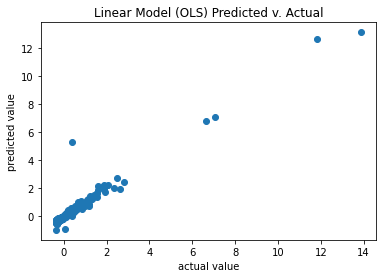

In [40]:
#Plotting Residuals

#difference between predicted and actual values (error) gives sense of how good model is
# predict the number of diabetes cases 
lin_pred = lin_model.predict(X_validate)

# plot the residuals on a scatter plot
plt.scatter(y_validate, lin_pred)
plt.title('Linear Model (OLS) Predicted v. Actual')
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.show()

#### Findings from plotting our residuals: #### 
Looking at our residuals plot above, we see that our predicted value generally equals our actual value, save for a few outliers.  

We do have quite a few gaps in the data (not sure what that is about)

In [41]:
#calculating rmse

#define function rmse that calculates mean squared error of predicted set of values
def rmse(pred, actual):
    return np.sqrt(np.mean((pred - actual) ** 2))

#rmse of linear model
rmse_lin = rmse(lin_pred, y_validate)
print(rmse_lin)

0.22126715948781495


#### Findings from calculating RMSE: #### 
Our RMSE is 0.22, which shows that there isn't a large average difference between our predicted and actual values using the linear model.

In [42]:
#hyperparameter tuning
param_grid = {'fit_intercept': ['True', 'False'],
              'normalize': ['True', 'False']}

lin_grid_reg = GridSearchCV(lin_reg, param_grid, cv=3, iid=False)
lin_grid_reg.fit(X_train, y_train)

best_index = np.argmax(lin_grid_reg.cv_results_["mean_test_score"])
best_lin_pred = lin_grid_reg.best_estimator_.predict(X_validate)

print(lin_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(lin_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', lin_grid_reg.score(X_validate, y_validate))
print('Validation RMSE', rmse(best_lin_pred, y_validate))

/Users/mahadertamene/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


{'fit_intercept': 'True', 'normalize': 'True'}
Best CV R^2: -8.068223372220022e+23
Validation R^2: 0.9453577972282164
Validation RMSE 0.22126715948781495


#### Findings from calculating hyperparameter tuning for linear model: #### 
Best CV R^2: -8.068223372220022e+23 <br>
Validation R^2: 0.9453577972282164 <br>
Validation RMSE 0.22126715948781495 <br>

#### Model 2: Ridge Regression

In [43]:
# 2. Ridge Regression 

#create a model
ridge_reg = Ridge() 

#fit the model
ridge_model = ridge_reg.fit(X_train, y_train)
ridge_reg_data = pd.DataFrame([ridge_model.coef_, X.columns]).T
ridge_reg_data.columns = ['Coefficient', 'Feature']

#### How good is our ridge model? We examine this in the following by:
- plotting residuals
- calculating root mean squared error (RMSE)
- hyperparameter tuning

#### We report relevant findings and statistics.

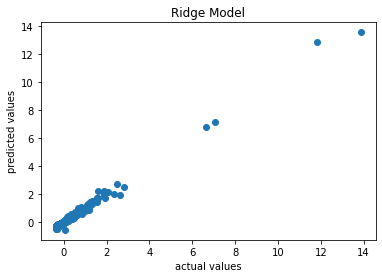

In [44]:
#Plotting Residuals

# use the model to make predictions
ridge_pred = ridge_model.predict(X_validate)

# plot the predictions
plt.scatter(y_validate, ridge_pred)
plt.title('Ridge Model')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

#### Findings from plotting our residuals for ridge model: #### 
Looking at our residuals plot above, we see that our predicted value generally equals our actual value. Compared to our linear model plot, we see that the outliers are no longer there; ridge seems to do a good job handling the outliers (as we would expect).  

In [51]:
#calculating rmse
rmse_ridge = rmse(ridge_pred, y_validate)
print(rmse_ridge)

0.08896264115650772


#### Findings from calculating RMSE for ridge model: #### 
Our RMSE for the ridge regression model is 0.089. When we compare with RMSE of 0.22 from linear model, seems that ridge is performing better to predict our data.

In [49]:
#hyperparameter tuning

param_grid = {'alpha': np.arange(.1, 1, .1),
               'normalize': ['True', 'False'],
             'fit_intercept': ['True', 'False'],
             'solver': ['auto', 'svd', 'cholesky', 'lsqr']}

ridge_grid_reg = GridSearchCV(ridge_reg, param_grid, cv=3, iid=False)
ridge_grid_reg.fit(X_train, y_train)

best_index = np.argmax(ridge_grid_reg.cv_results_["mean_test_score"])
best_ridge_pred = ridge_grid_reg.best_estimator_.predict(X_validate)

print(ridge_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(ridge_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', ridge_grid_reg.score(X_validate, y_validate))
print('Validation RMSE', rmse(best_ridge_pred, y_validate))

/Users/mahadertamene/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


{'alpha': 0.1, 'fit_intercept': 'True', 'normalize': 'True', 'solver': 'svd'}
Best CV R^2: 0.9842699773512357
Validation R^2: 0.9901938626949945
Validation RMSE 0.09373501350857441


#### Findings from calculating hyperparameter tuning for ridge model: #### 
Best CV R^2: 0.9842699773512357 <br>
Validation R^2: 0.9901938626949945 <br>
Validation RMSE 0.09373501350857441 <br>

#### Model 3: LASSO Regression

In [47]:
# 3. LASSO Regression

#create a model
lasso_reg = Lasso(max_iter=10000)  

#fit a model
lasso_model = lasso_reg.fit(X_train, y_train)
lasso_reg_data = pd.DataFrame([lasso_model.coef_, X.columns]).T
lasso_reg_data.columns = ['Coefficient', 'Feature']

#### How good is our LASSO model? We examine this in the following by:
- plotting residuals
- calculating root mean squared error (RMSE)
- hyperparameter tuning

#### We report relevant findings and statistics.

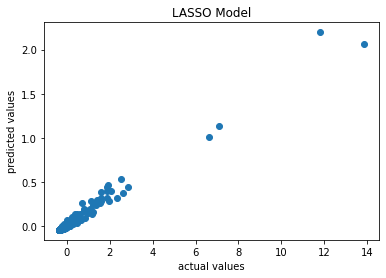

In [48]:
#Plotting Residuals

# use the model to make predictions
lasso_pred = lasso_model.predict(X_validate)

# plot the predictions
plt.scatter(y_validate, lasso_pred)
plt.title('LASSO Model')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

#### Findings from plotting our residuals: #### 
Looking at the residual plot for our LASSO model, it appears that the line is a little more dispersed than both the ridge and linear residual plots, suggesting that LASSO might not be a good model to predict this data. This might be because LASSO is dropping some coefficients (shrinking them to 0) that are important in predicting our data.

In [52]:
#calculating rmse
rmse_lasso = rmse(lasso_pred, y_validate)
print(rmse_lin, rmse_ridge, rmse_lasso)

0.22126715948781495 0.08896264115650772 0.7929112579207346


#### Findings from calculating RMSE: #### 
Our RMSE for the lasso regression model is 0.79. When we compare with RMSE of 0.22 from linear model and RMSE of 0.089 from ridge model, it seems that LASSO performs the worst in predicting our dataset.

In [53]:
#hyperparameter tuning

param_grid = {'alpha': np.arange(.1, 1, .1),
               'normalize': ['True', 'False'],
             'fit_intercept': ['True', 'False'],
             'selection': ['cyclic', 'random']}

lasso_grid_reg = GridSearchCV(lasso_reg, param_grid, cv=3, iid=False)
lasso_grid_reg.fit(X_train, y_train)

best_index = np.argmax(lasso_grid_reg.cv_results_["mean_test_score"])
best_lasso_pred = lasso_grid_reg.best_estimator_.predict(X_validate)

print(lasso_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(lasso_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', lasso_grid_reg.score(X_validate, y_validate))
print('Validation RMSE', rmse(best_lasso_pred, y_validate))

{'alpha': 0.1, 'fit_intercept': 'True', 'normalize': 'True', 'selection': 'cyclic'}
Best CV R^2: -0.0028550289133850715
Validation R^2: -0.0020959170835412877
Validation RMSE 0.9475617201877921


/Users/mahadertamene/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


#### Findings from calculating hyperparameter tuning for LASSO model: #### 
Best CV R^2: -0.0028550289133850715 <br>
Validation R^2: -0.0020959170835412877 <br>
Validation RMSE 0.9475617201877921 <br>

#### Model 4: Esastic Net

In [56]:
from sklearn.linear_model import ElasticNet

In [58]:
#4. Elastic Net

#create a model
elastic_reg = ElasticNet

In [60]:
#fit a model
elastic_model = elastic_reg.fit(X_train, y_train)
elastic_reg_data = pd.DataFrame([elastic_model.coef_, X.columns]).T
elastic_reg_data.columns = ['Coefficient', 'Feature']

TypeError: fit() missing 1 required positional argument: 'y'

#### How good is our [INSERT MODEL] model? We examine this in the following by:
- plotting residuals
- calculating root mean squared error (RMSE)
- hyperparameter tuning

#### We report relevant findings and statistics.

In [ ]:
#Plotting Residuals

# use the model to make predictions
elastic_pred = elastic_model.predict(X_validate)

# plot the predictions
plt.scatter(y_validate, elastic_pred)
plt.title('Elastic Model')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

#### Findings from plotting our residuals: #### 

In [ ]:
#calculating rmse

#### Findings from calculating RMSE: #### 

In [ ]:
#hyperparameter tuning

#### Findings from calculating hyperparameter tuning for [INSERT MODEL] model: #### 

#### Model 5: Trees 

In [ ]:
#create a model

#fit a model

#### How good is our [INSERT MODEL] model? We examine this in the following by:
- plotting residuals
- calculating root mean squared error (RMSE)
- hyperparameter tuning

#### We report relevant findings and statistics.

In [ ]:
#Plotting Residuals

# use the model to make predictions


# plot the predictions


#### Findings from plotting our residuals: #### 

In [ ]:
#calculating rmse

#### Findings from calculating RMSE: #### 

In [ ]:
#hyperparameter tuning

#### Findings from calculating hyperparameter tuning for [INSERT MODEL] model: #### 

## 5) Validate & Refine Models ##

## 5.1 Predict on the Validation Set ##

##### Using each of the models you trained, predict outcomes in the validation set. Evaluate how well each model did. #####

In [ ]:
#1. Linear Regression model
y_pred = lin_model.predict(X_validate)

In [ ]:
# 1. Linear regression model continued 

#plot the residuals on a scatter plot
plt.scatter(y_validate, lin_pred)
plt.title('Linear Model (OLS) Predicted v. Actual')
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.show()

## 5.2 Feature Selection ##

##### Conduct feature selection using techniques specific to these models. For instance, you might use coefficient cutoffs or variable importance plots. If you used a model that does automatic feature selection, detail those results as well. #####

In [ ]:
## not sure how to do this... LASSO didn't perform well, but does automatic feature selection
##consider dropping Obesity and Physical inactivity because of high co-linearity? 
#wonder about this because technically that's what LASSO does and it did not perform well...

## 5.3 Test Set ##

##### Choose your best performing model, select out unimportant features, retrain the model, and then predict on the test set. Evaluate your performance on this test set. What is the advantage of using both validation and test sets in the social sciences and public policy? #####

In [ ]:
#see #6 in Regression solutions

## I think it's the linear model...

## 5.4 Implement a Cross-Validation Approach ##

##### Do the following:
##### • Using your preferred model, use a k-fold cross-validation approach to refit the model.
##### • Describe the tradeoffs involved with the choice of k.
##### • Evaluate the results. How did cross-validation do compared to the train/validation/test split?

## 6) Discussion Questions ##

## 6.1 What is bias-variance tradeoff. Why is it relevant to machine learning problems like this one? ##

The bias-variance tradeoff is the balance of two sources of error within machine learning.  Essentially when doing model fitting, you are concerned with underfitting (introducing more bias to the model) or overfitting (introducing more variance to the model).  In addressing bias, you increase variance, and vice versa. The goal is to find a balance between how much bias and variance to accept in order to allow for better performance of your data.  Data splitting allows you to do this by splitting the actual data into multiple sets and training the data to the most optimal model for out-of-sample prediction, like predicting which counties wil have highest rates of diagnosed diabetes in order to plan more effective interventions.

## 6.2 Define overfitting, and why it matters for machine learning. How can we address it? ##

Overfitting is when a model picks up noise and essentially registers it as important pattern of the data.  It sees the outliers, or noisy part of the data as part of the actual pattern of the data and includes that in predicting the model estimates.  Machine learning is particularly prone to overfitting, which is why we split, train, validate, and cross validate before testing the data.  In training our data, using the validation set to see how well our models perform, we can make tweaks and changes based on model performance, before finalizing which model is best.    

## 6.3 Discuss your Analysis in 2-3 Paragraphs ##